In [98]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
from bioinfokit.analys import stat
dane = pd.read_excel("B:/pobrane/Macierze_Twardości (1).xlsx")
dane
pom = dane.drop(0)
p = pom["Lany"].tolist()
a= pom["Kuty"].tolist()
b = pom["Lany.1"].tolist()
c = pom["Kuty.1"].tolist()
r = np.concatenate([p,b])
r1 = np.concatenate([a,c])
pom2 = pd.DataFrame({"twardość":r})
pom3 = pd.DataFrame({"twardość":r1})
p = ["Lany" for x in range(0,49)]
a = ["Kuty" for x in range(0,49)]
b = ["Lany" for x in range(0,49)]
c = ["Kuty" for x in range(0,49)]
r = np.concatenate([p,b])
r1 = np.concatenate([a,c])
pom2["Stan"] = r
pom3["Stan"] = r1
p = [0.8 for x in range(0,49)]
a = [1.2 for x in range(0,49)]
b = [0.8 for x in range(0,49)]
c = [1.2 for x in range(0,49)]
r = np.concatenate([p,a])
r1 = np.concatenate([b,c])
pom2["C"] = r
pom3["C"] = r1
pom2

,twardość,Stan,C
0,343,Lany,0.8
1,298,Lany,0.8
2,336,Lany,0.8
3,337,Lany,0.8
4,392,Lany,0.8
...,...,...,...
93,430,Lany,1.2
94,451,Lany,1.2
95,436,Lany,1.2
96,427,Lany,1.2


[]

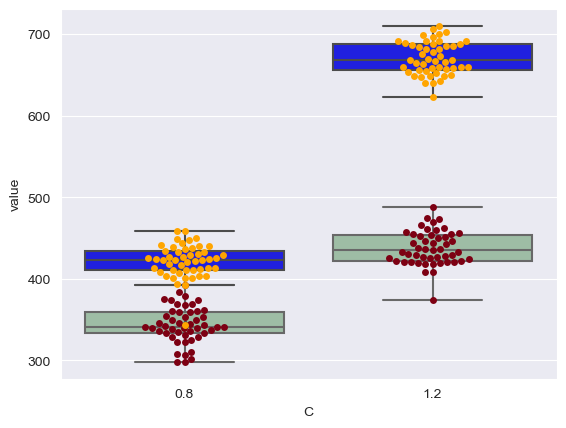

In [101]:
df_melt = pd.melt(pom2.reset_index(),id_vars=["C"],value_vars=["twardość"])
df_melt2 = pd.melt(pom3.reset_index(),id_vars=["C"],value_vars=["twardość"])
ax = sns.boxplot(x='C', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="C", y="value", data=df_melt, color='#7d0013')
ax = sns.boxplot(x='C', y='value', data=df_melt2, color='blue')
ax = sns.swarmplot(x="C", y="value", data=df_melt2, color='orange')
plt.plot()

In [103]:
g1 = pom["Lany"].tolist()
g2 = pom["Kuty"].tolist()
g3 = pom["Lany.1"].tolist()
g4 = pom["Kuty.1"].tolist()
t,p = st.levene(g1,g2,g3,g4)
print(f"{p=}")
if p < 0.05:
    print("Wariancje są zdecydowanie różne, zatem nie spełniają podstawowych założeń")
else:
    print("Wariancje nie są zdecydowanie różne, spełniają standardowe założenia")

p=0.7700852261263589
Wariancje nie są zdecydowanie różne, spełniają standardowe założenia


Test spełnia podane założenia, wraz ze wzrostem zawartości węgla rośnie twardość, a wraz ze zmianą stanu z lanego na kuty twardość wyraźnie się zwiększa